## Demo for modelling single-channel PSF from bead data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
#main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [5]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='zernike',channeltype='1ch',sysfile='smart_tirf')


#### Edit user defined parameters

In [99]:
L.param.datapath = r'C:\Users\Sheng\Documents\MATLAB\bead100nm_smart\08-09-2024 tirf_60x/'
L.param.savename = L.param.datapath+'psfmodel'
L.param.keyword = 'bead12' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.1 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 20 
L.param.roi.bead_radius = 0.0
L.param.batch_size = 30 # lower this number if out of memory
L.param.option.imaging.emission_wavelength = 0.68 # micron
L.param.FOV.y_center = 0
L.param.FOV.x_center = 0
L.param.FOV.radius = 0



#### Start learning

In [100]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

(1, 21, 256, 256)
rois shape channel : (11, 21, 25, 25)


3/6: learning: 133/250 [00:12s] 10.87it/s, current loss: 1.28408, total time: 12.24s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.26s/it total time: 13.50s
5/6: localization: 5/5 [00:00s] 12.85it/s total time: 13.89s


outlier id: [8]
rois shape channel : (10, 21, 25, 25)


3/6: learning: 111/250 [00:10s] 11.04it/s, current loss: 1.24660, total time: 23.94s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.27s/it total time: 25.21s
5/6: localization: 5/5 [00:00s] 12.03it/s total time: 25.62s
6/6: saving results: [00:02s] total time: 28.18s


#### Show results

In [101]:
f,p = io.h5.load(resfile) # load result file

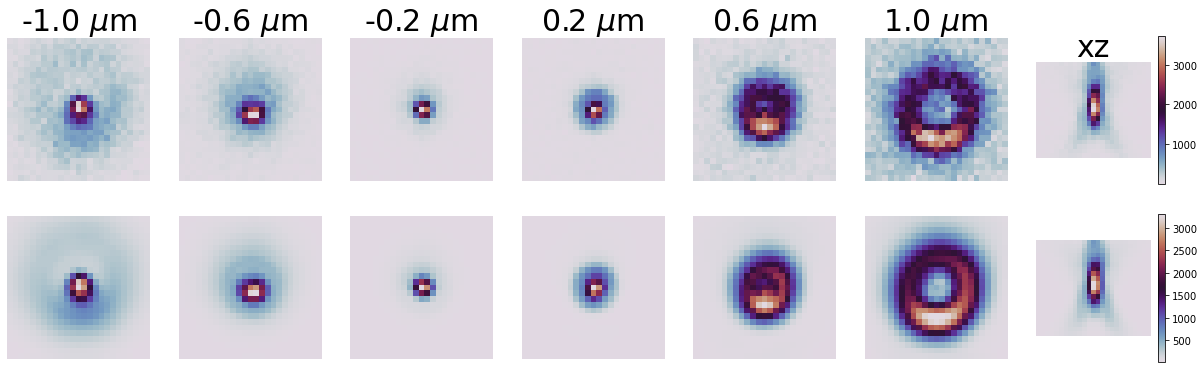

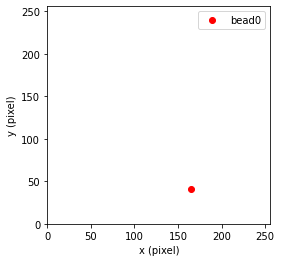

In [102]:
showpsfvsdata(f,p,index=0)

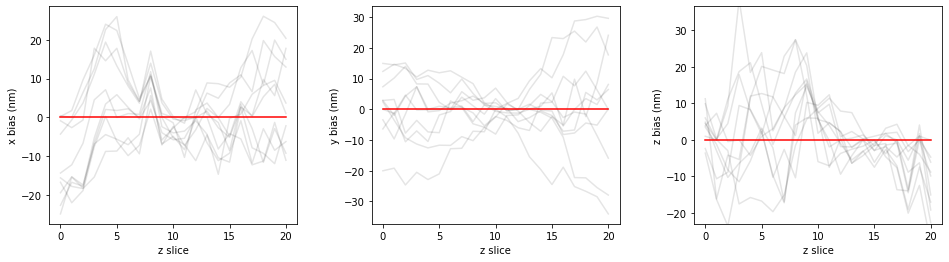

In [103]:
showlocalization(f,p)

#### Optional plots

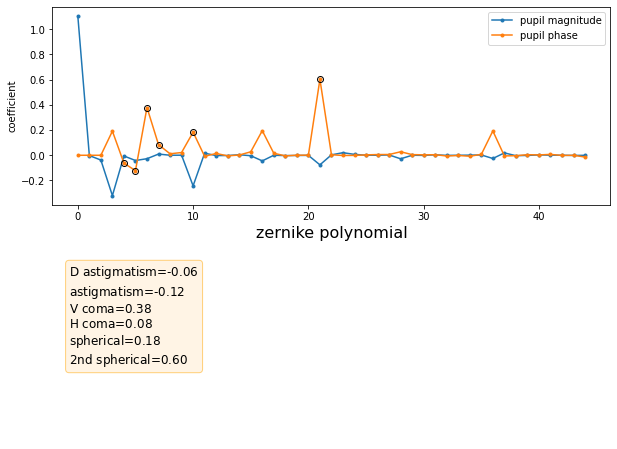

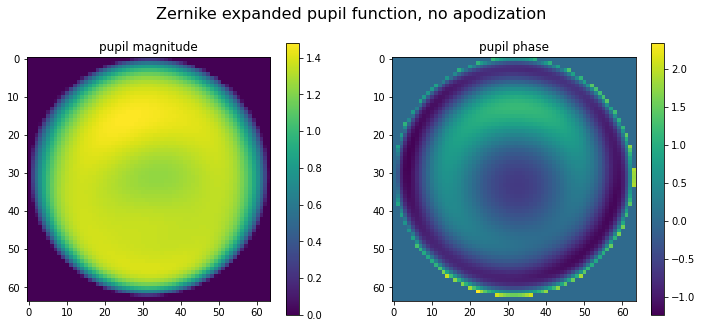

In [104]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

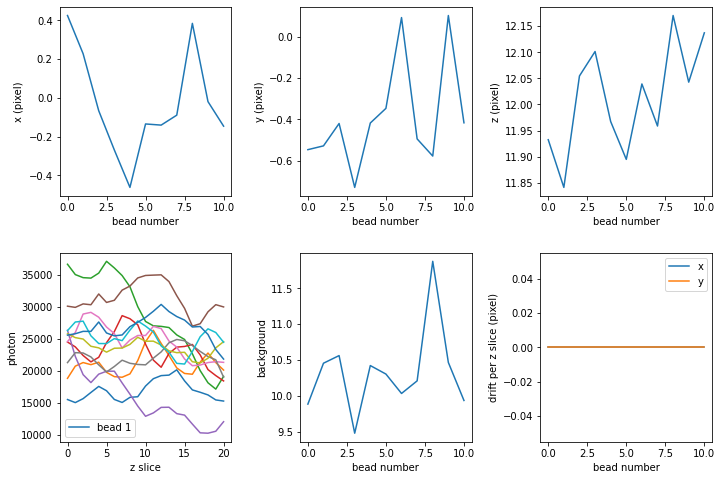

In [90]:
showlearnedparam(f,p)

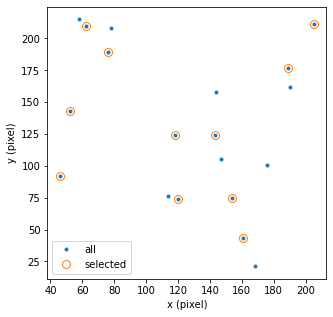

In [91]:
showcoord(f,p)

#### Ouput parameters

In [11]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'I_model_bead', 'I_model_reverse', 'apodization', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'zernike_coeff', 'zernike_polynomial']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
